###  Created by Luis Alejandro (alejand@umich.edu)

In [1]:
import tensorflow as tf
import numpy as np
from utils import unicode_to_ascii
from dataset import DatasetBuilder
from attention_translation import preprocess
from attention_translation import Translator
from attention_translation import plot_attention
import os
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

In [2]:
# GPU?
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# Creates dataset for training
files = ['../../datasets/nlp/english-spanish.txt']
builder = DatasetBuilder(files, preprocessors=(preprocess,preprocess), batch_size=64, max_obs=40000, test_obs=30)
train_dataset, test_dataset = builder.build()

In [4]:
# Load embedding matrix (glove vectors) -> these will only be used for English (source/input)
embedding_size = 100
word_to_vector = {}
with open('../../datasets/glove.6B/glove.6B.%sd.txt' % embedding_size, encoding='utf8') as file:
    for line in file:
        values = line.split()
        word = unicode_to_ascii(values[0])
        vector = np.asarray(values[1:],dtype=np.float32)
        word_to_vector[word] = vector
        
embedding_vectors = np.zeros((len(builder.source_tokenizer.word_to_index), embedding_size))
for word, index in builder.source_tokenizer.word_to_index.items():
    if word.decode() in word_to_vector:
        embedding_vectors[index,:] = word_to_vector[word.decode()]

In [5]:
# Defining model
translator = Translator(builder.source_tokenizer,
                        builder.target_tokenizer,
                        source_embedding_matrix=embedding_vectors,
                        target_embedding_size=embedding_size,
                        max_output_length=builder.target_tokenizer.max_seq,
                        attention_size=512,
                        restore=False, 
                        masking=False)

In [6]:
# Training model
translator.train(10, train_dataset)


Epoch 1 out of 10 complete (93.74 secs) -- Train Loss: 2058.1179 -- Train Bleu: 0.00
Epoch 2 out of 10 complete (33.14 secs) -- Train Loss: 1462.3990 -- Train Bleu: 0.04
Epoch 3 out of 10 complete (33.82 secs) -- Train Loss: 1201.3220 -- Train Bleu: 0.08
Epoch 4 out of 10 complete (34.41 secs) -- Train Loss: 973.9218 -- Train Bleu: 0.15
Epoch 5 out of 10 complete (35.23 secs) -- Train Loss: 792.1778 -- Train Bleu: 0.23
Epoch 6 out of 10 complete (33.91 secs) -- Train Loss: 655.0432 -- Train Bleu: 0.31
Epoch 7 out of 10 complete (33.64 secs) -- Train Loss: 549.0828 -- Train Bleu: 0.38
Epoch 8 out of 10 complete (34.07 secs) -- Train Loss: 465.3849 -- Train Bleu: 0.44
Epoch 9 out of 10 complete (34.04 secs) -- Train Loss: 397.1475 -- Train Bleu: 0.49
Epoch 10 out of 10 complete (34.12 secs) -- Train Loss: 341.2936 -- Train Bleu: 0.54
Creating intermediate checkpoint!

Creating final checkpoint!


Expected: ambas estan muertas .
Translation: los dos estan muertos .



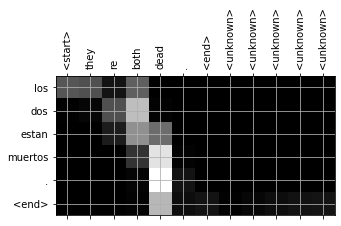

Expected: soy tuyo .
Translation: soy suyo .



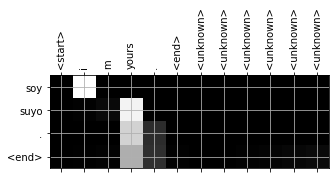

Expected: ¿ que pelicula viste ?
Translation: ¿ que te viste ?



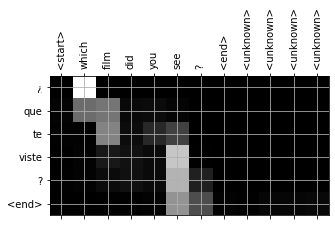

Expected: esto esta desordenado .
Translation: esto esta lloviendo .



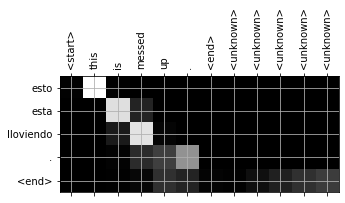

Expected: soy negado para el frances .
Translation: estoy totalmente en frances .



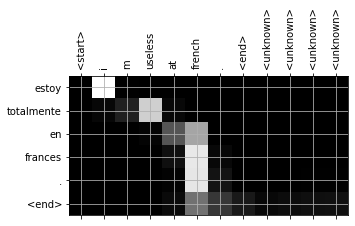

Expected: dame la cuchara .
Translation: dame la toalla .



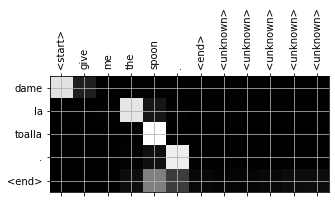

Expected: sos muy egoista .
Translation: eres tan egoista .



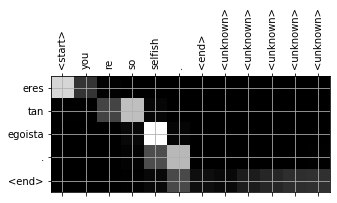

Expected: esta situacion es divertida .
Translation: esto esta cosa es gracioso .



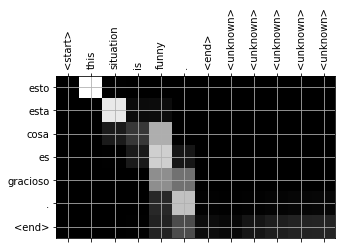

Expected: tom compro flores .
Translation: tom compro flores .



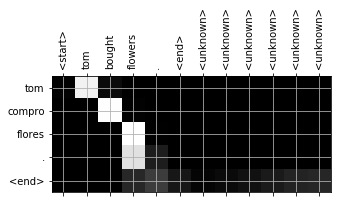

Expected: ¿ ves al mapache ?
Translation: ¿ ves el arca de noe ?



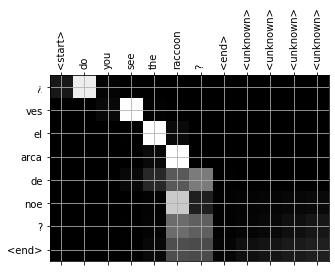

Expected: ¿ que tan lejos esta de aqui ?
Translation: ¿ cuanto tiempo de la ciudad ?



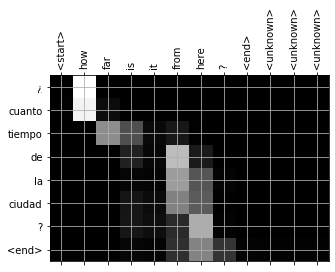

Expected: di patata .
Translation: decid guisqui .



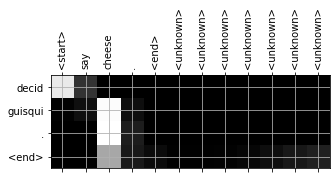

Expected: no estoy hecho de dinero .
Translation: no estoy hecho de dinero .



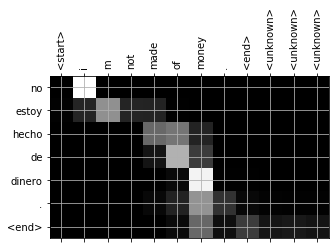

Expected: alguien llego .
Translation: alguien vino .



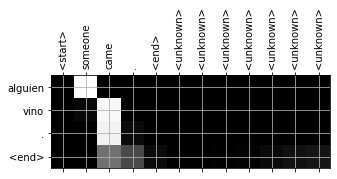

Expected: no me gustan los chicos malos .
Translation: no me gustan los perros .



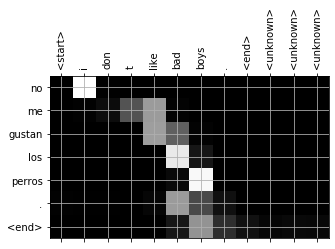

Expected: se esta fresquito .
Translation: esta nevando .



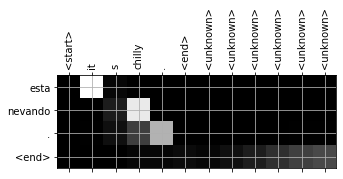

Expected: no es importante .
Translation: eso es discutible .



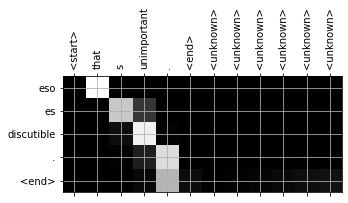

Expected: ¿ te ofende ?
Translation: ¿ te entiende ?



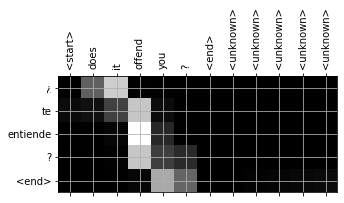

Expected: me escondi .
Translation: me escondia .



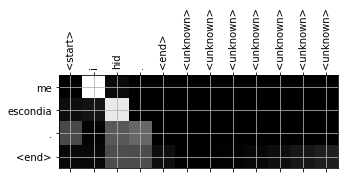

Expected: saquelo de la casa .
Translation: sal de la casa .



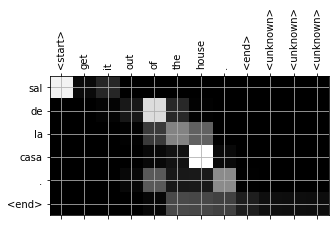

Expected: ¿ cuanto mides ?
Translation: ¿ cuanto mas eres ?



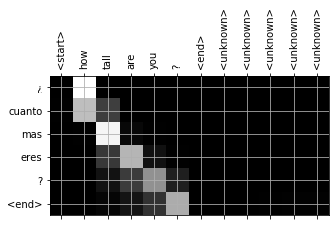

Expected: es un hombre de accion .
Translation: el es un hombre de accion .



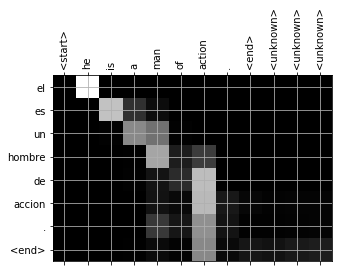

Expected: me gusta como cantas .
Translation: me gusta tu manera de cantar .



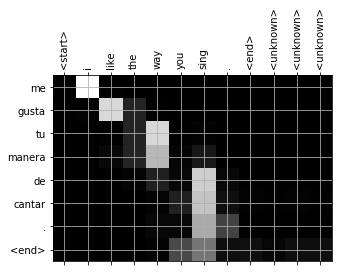

Expected: no puedo pensar en otra cosa .
Translation: no puedo creer que no haya verdad .



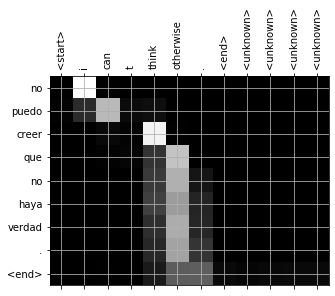

Expected: tiene un libro .
Translation: ella tiene una libro .



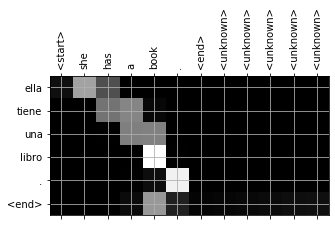

Expected: a el le va a encantar esto .
Translation: el va a encantar esto .



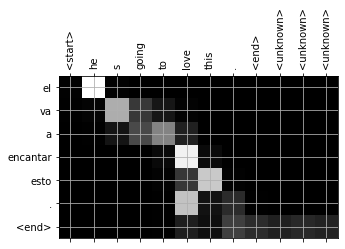

Expected: ¿ cuales son mis elecciones ?
Translation: ¿ cuales son mis opciones ?



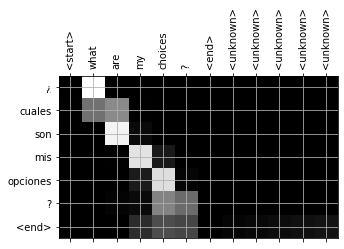

Expected: no es perfecto .
Translation: no es perfecto .



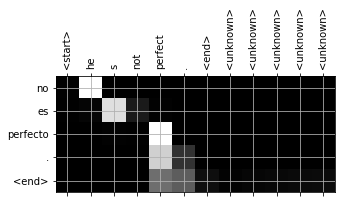

Expected: ¿ que ha sido eso ?
Translation: ¿ que fue ese ruido ?



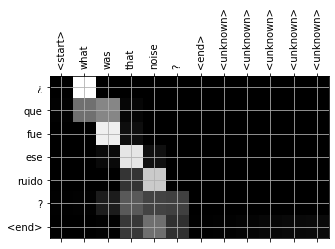

Expected: el te va a ayudar .
Translation: el esta listo para ayudarte .



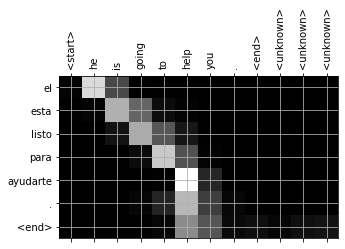

Bleu: 0.3751893264748753


In [7]:
# Test model
translator.evaluate(test_dataset)

In [8]:
# Training model
translator.train(10, train_dataset)


Epoch 1 out of 10 complete (34.88 secs) -- Train Loss: 295.5028 -- Train Bleu: 0.59
Epoch 2 out of 10 complete (35.39 secs) -- Train Loss: 258.8479 -- Train Bleu: 0.63
Epoch 3 out of 10 complete (35.31 secs) -- Train Loss: 228.6031 -- Train Bleu: 0.67
Epoch 4 out of 10 complete (34.37 secs) -- Train Loss: 203.6809 -- Train Bleu: 0.69
Epoch 5 out of 10 complete (34.28 secs) -- Train Loss: 182.9335 -- Train Bleu: 0.72
Epoch 6 out of 10 complete (35.58 secs) -- Train Loss: 164.7846 -- Train Bleu: 0.74
Epoch 7 out of 10 complete (35.89 secs) -- Train Loss: 149.6264 -- Train Bleu: 0.76
Epoch 8 out of 10 complete (34.75 secs) -- Train Loss: 135.5568 -- Train Bleu: 0.78
Epoch 9 out of 10 complete (36.63 secs) -- Train Loss: 124.8262 -- Train Bleu: 0.79
Epoch 10 out of 10 complete (34.71 secs) -- Train Loss: 114.3582 -- Train Bleu: 0.81
Creating intermediate checkpoint!

Creating final checkpoint!


Expected: ambas estan muertas .
Translation: ambos estan muertos .



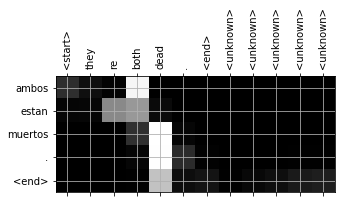

Expected: soy tuyo .
Translation: soy suyo .



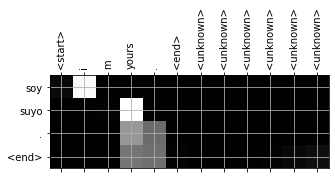

Expected: ¿ que pelicula viste ?
Translation: ¿ que noche viste ?



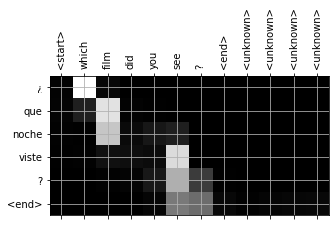

Expected: esto esta desordenado .
Translation: esto es extrana .



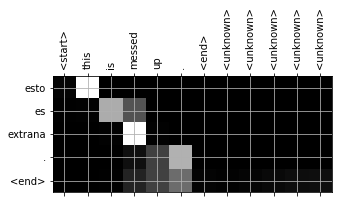

Expected: soy negado para el frances .
Translation: soy un poco de frances .



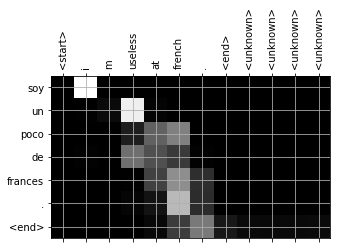

Expected: dame la cuchara .
Translation: dame la cuchara .



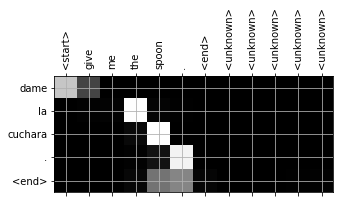

Expected: sos muy egoista .
Translation: eres tan egoista .



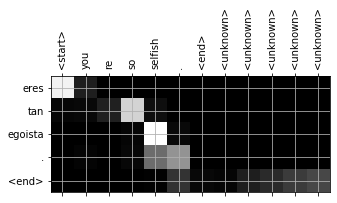

Expected: esta situacion es divertida .
Translation: esta situacion es extrana .



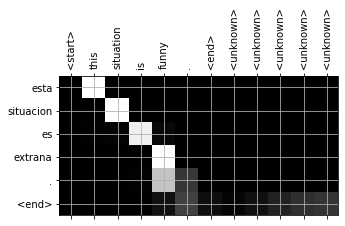

Expected: tom compro flores .
Translation: tom compro flores .



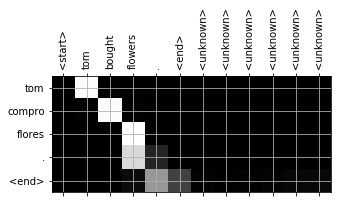

Expected: ¿ ves al mapache ?
Translation: ¿ ves el arca de las ?



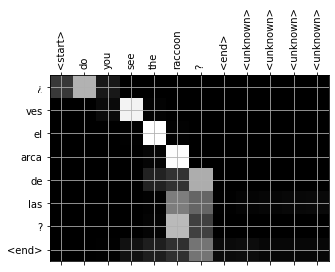

Expected: ¿ que tan lejos esta de aqui ?
Translation: ¿ como de tiempo de aqui ?



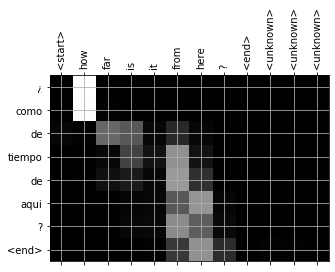

Expected: di patata .
Translation: sonria .



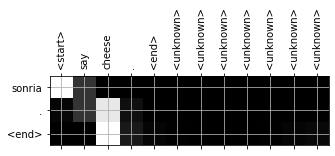

Expected: no estoy hecho de dinero .
Translation: no estoy hecho de dinero .



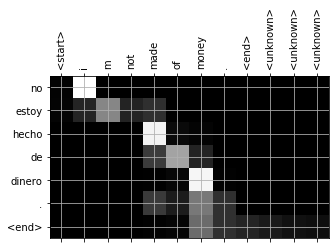

Expected: alguien llego .
Translation: alguien ha venido .



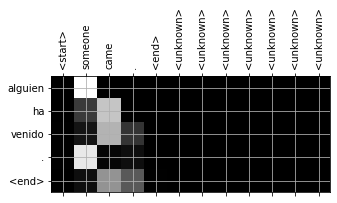

Expected: no me gustan los chicos malos .
Translation: no me gusta el dan los ninos .



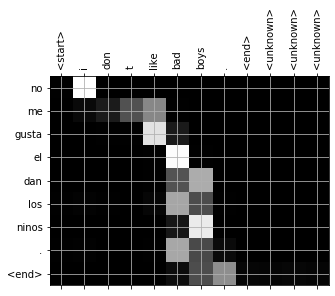

Expected: se esta fresquito .
Translation: hace fresco .



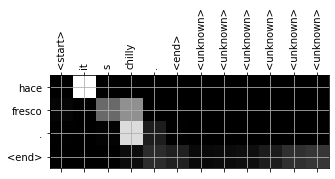

Expected: no es importante .
Translation: eso no importa .



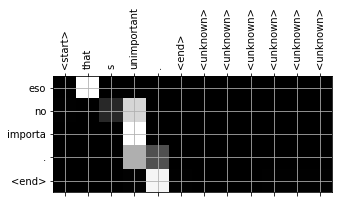

Expected: ¿ te ofende ?
Translation: ¿ te entiende ?



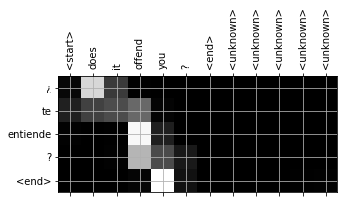

Expected: me escondi .
Translation: me ocultaba .



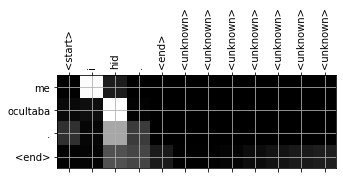

Expected: saquelo de la casa .
Translation: salid del cuarto .



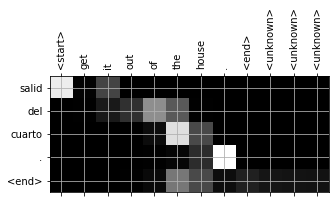

Expected: ¿ cuanto mides ?
Translation: ¿ de que tan sos ?



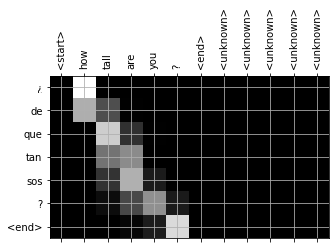

Expected: es un hombre de accion .
Translation: el es un hombre de accion .



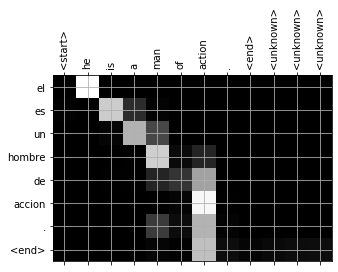

Expected: me gusta como cantas .
Translation: me gusta tu manera de cantar .



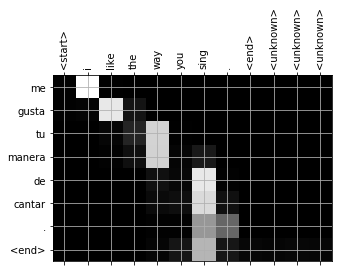

Expected: no puedo pensar en otra cosa .
Translation: no puedo decirlo con facilidad .



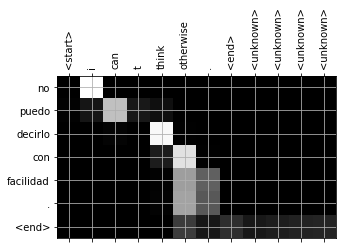

Expected: tiene un libro .
Translation: ella tiene un libro .



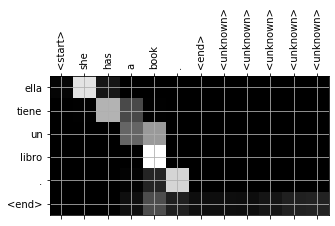

Expected: a el le va a encantar esto .
Translation: va a encantar esto .



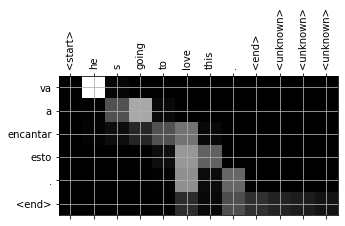

Expected: ¿ cuales son mis elecciones ?
Translation: ¿ cuales son mis opciones ?



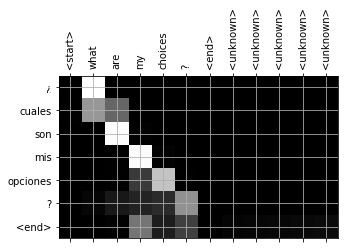

Expected: no es perfecto .
Translation: no es perfecto .



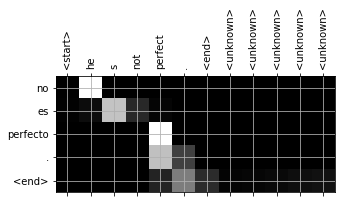

Expected: ¿ que ha sido eso ?
Translation: ¿ que fue ese ruido ?



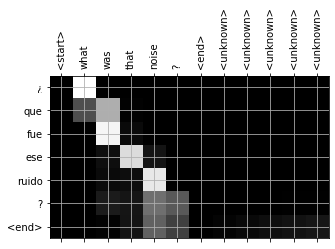

Expected: el te va a ayudar .
Translation: te va a ayudarte .



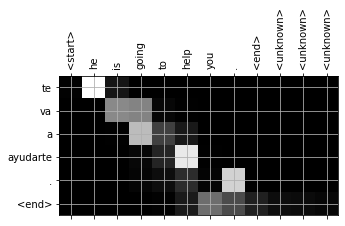

Bleu: 0.405753326792926


In [9]:
# Test model
translator.evaluate(test_dataset)

In [10]:
# Creating some input
source = b"I'm very happy to see you."
source = preprocess(tf.constant(source))
source = tf.strings.split(tf.constant(source))
print(source)
source = builder.source_tokenizer.encode(source.numpy())
source = tf.constant(np.pad(source, (0, builder.source_tokenizer.max_seq - len(source))),
                     shape=[1, builder.source_tokenizer.max_seq])
print(source)

tf.Tensor([b'<start>' b'i' b'm' b'very' b'happy' b'to' b'see' b'you' b'.' b'<end>'], shape=(10,), dtype=string)
tf.Tensor([[  1  18  50 947 296 256 105 106   3   4   0   0]], shape=(1, 12), dtype=int32)


estoy muy feliz de verte . <end>


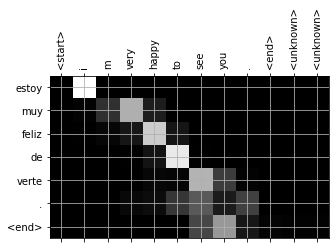

In [11]:
# Outputing model translation
prediction, attention = translator.translate(source, return_attention=True)
print(' '.join(builder.target_tokenizer.index_to_word[word].decode() for word in prediction))
plot_attention(attention, tf.squeeze(source).numpy(), prediction,
               builder.source_tokenizer.index_to_word,
               builder.target_tokenizer.index_to_word)